# PCA visualization

In this notebook, we will use PCA to reduce the dimensionality of the images, addressing the following questions:

1. What input size is appropriate, considering accuracy and execution time?
2. What is the optimal number of components?
3. How representative are the reconstructed images with the reduced dimensionality of the original images?

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from utils.read import read_data

In [140]:
train_features, train_labels = read_data('../dataset/train', flatten=1, grayscale=1, resize=(50, 50))
train_features = np.array(train_features)
train_labels = np.array(train_labels)
train_features.shape

(27352, 2500)

In [141]:
pca = PCA(svd_solver='randomized').fit(train_features)  

Find out the cumulative explained variance and correspondent dimensions

In [142]:
component_variance = np.cumsum(pca.explained_variance_ratio_)

In [143]:
pd.DataFrame(component_variance).head(10)

,0
0,0.358743
1,0.546434
2,0.622262
3,0.678816
4,0.713487
5,0.737558
6,0.755822
7,0.773340
8,0.788524
9,0.800327


Find the dimensions which can represent certain fractions of explained variance

In [144]:
variance_threshold = [0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
dimension_candidates = np.array([np.argmax(component_variance > i) for i in variance_threshold])
print(dimension_candidates)

[  6   9  16  35 102 588]


Draw the fraction of explained variance-dimension chart

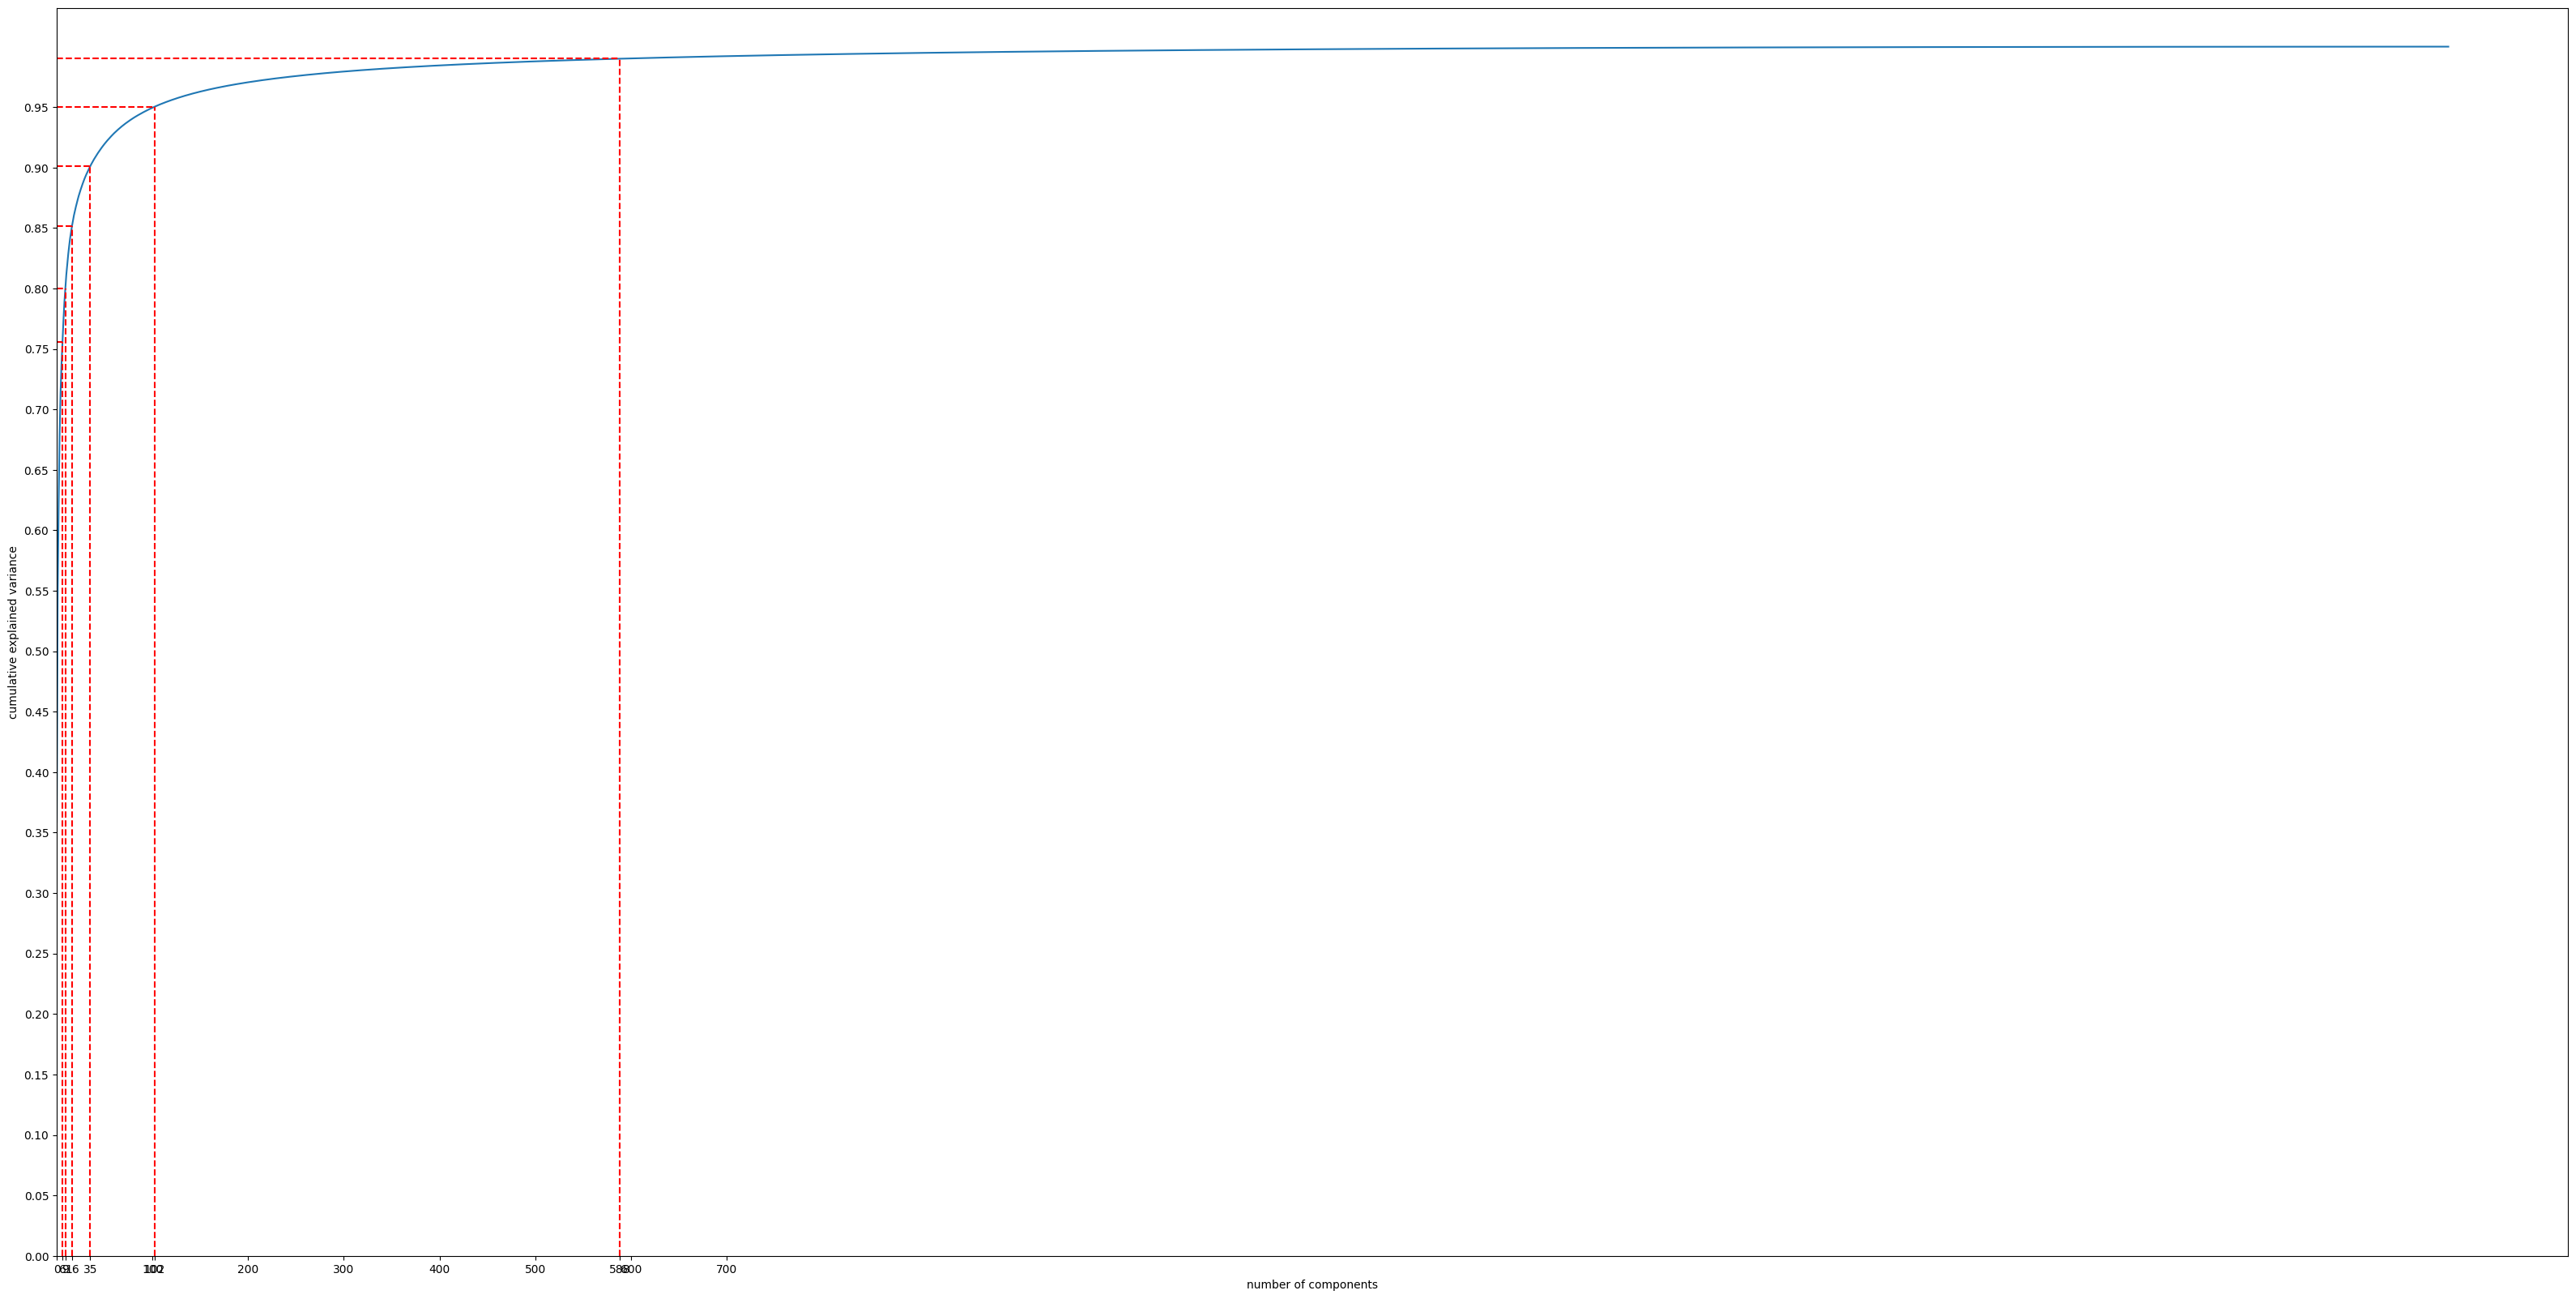

In [145]:
fig, ax = plt.subplots(figsize=(40, 20))
ax.plot(component_variance)
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
ax.set_xticks(np.concatenate((dimension_candidates, np.arange(0, 784, 100))))
ax.set_yticks(np.arange(0, 1.0, 0.05))
ax.set_xlabel('number of components')
ax.set_ylabel('cumulative explained variance')

# Draw lines for the thresholds for cumulative variance
for d in dimension_candidates:
    y_variance = component_variance[d]
    ax.vlines(d, 0.0, y_variance, linestyles='dashed', colors='red')
    ax.hlines(y_variance, 0.0, d, linestyles='dashed', colors='red')

plt.show()

Apply a PCA transformation to reduce the dimensionality of the data

In [146]:
projected = pca.transform(train_features)
print('Total number of PCA Components = {0}'.format(pca.n_components_))

Total number of PCA Components = 2500


In [147]:
projected.shape

(27352, 2500)

Get principle vectors

In [148]:
pca.components_.shape

(2500, 2500)

In [149]:
pca.components_

array([[ 5.61903326e-03,  1.13193671e-02,  1.11121856e-02, ...,
        -2.06941111e-02, -2.12988565e-02, -2.17123310e-02],
       [-2.45170797e-03, -5.29758216e-03, -5.59381029e-03, ...,
        -1.89928548e-03, -2.68400771e-03, -3.19933289e-03],
       [-1.06339396e-03, -2.46139587e-03, -2.60355684e-03, ...,
        -3.58725886e-03, -2.75139536e-03, -2.15269161e-03],
       ...,
       [ 6.14369747e-02, -1.59385854e-04, -6.66454186e-03, ...,
        -1.12627633e-03,  1.34620836e-03, -1.50008935e-03],
       [ 8.70283721e-02, -2.78139310e-02,  2.74949052e-03, ...,
         4.38818637e-04, -1.36912272e-03,  8.67458515e-04],
       [-9.68604361e-01,  4.97273907e-02,  7.32942451e-02, ...,
        -6.07113610e-04, -2.12380794e-04,  2.49852332e-04]])

Visualize the top 2 most representative dimensions to see how well they represent the images. As we can see from the chart, the top 2 dimensions can not distinguish classes very clearly.

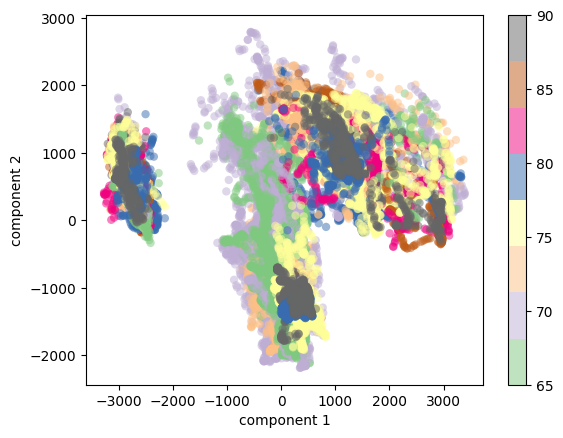

In [150]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=[ord(char) for char in train_labels], edgecolor='none', alpha=0.5,
            cmap=plt.colormaps.get_cmap('Accent'))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

Reconstruct the data

We can vary the number of components in PCA and see the quality of the reconstructed data. In the following cell, we display a set of 26 images and in subsequent rows we display the reconstructed versions of these 26 images with progressively more components. When only using a few components (the first few rows), the reconstruction is blurry and lacks fidelity. Once we get to around 102 components, however, the reconstructions is fairly good, getting 95% of the explained variance. This indicates that the full set of 2500 components is clearly not needed to represent this data.

In [151]:
def plot_sign(features=None, labels=None):
    n_features = len(features)
    fig, axes = plt.subplots(1, n_features, figsize=(n_features*10, 15))
    
    for i in range(n_features):
        a = np.expand_dims(features[i], axis=0).reshape(50,50)
        axes[i].imshow(a, cmap='gray')
        axes[i].set_title(labels[i], fontsize=50)
        axes[i].set_xticks([])
        axes[i].set_yticks([])
        
    plt.tight_layout()
    plt.show()

In [152]:
# Get example images
unique_labels = list(set(train_labels))
example_indexes = []
example_features = []
for label in unique_labels:
    index = np.where(train_labels == label)[0][0]
    example_indexes.append(index)
    example_features.append(train_features[index])

Number of components: 1 ; Explained variance: 0.55


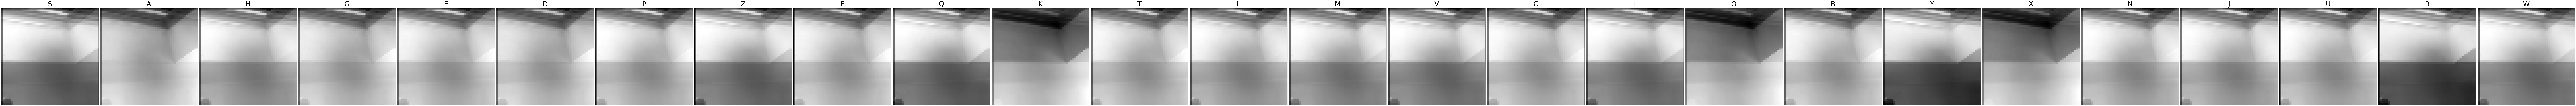

Number of components: 2 ; Explained variance: 0.62


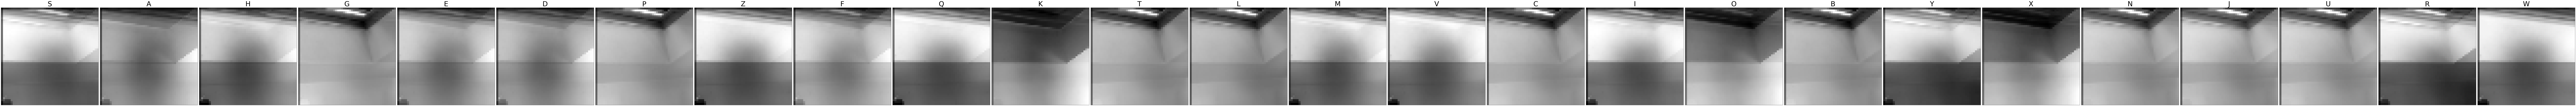

Number of components: 3 ; Explained variance: 0.68


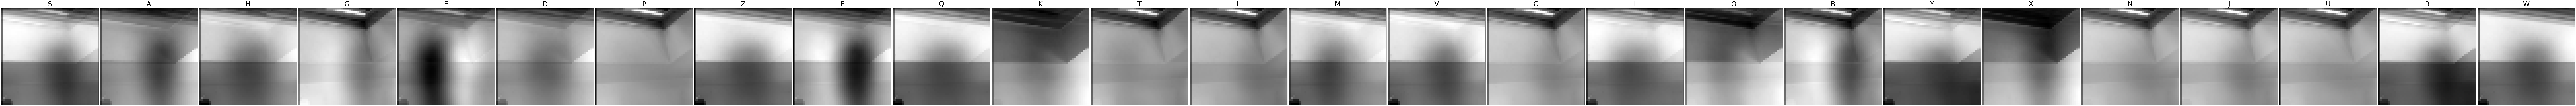

Number of components: 4 ; Explained variance: 0.71


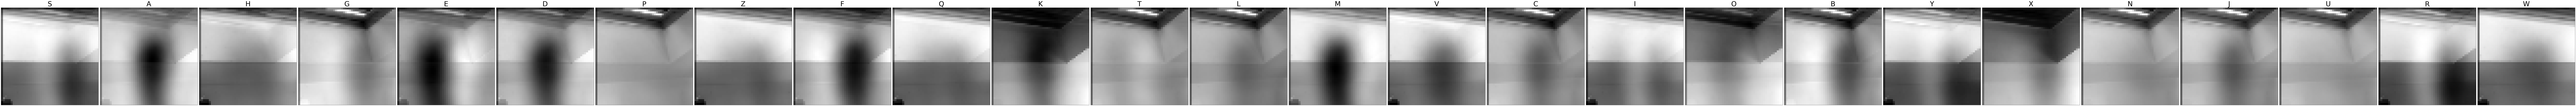

Number of components: 5 ; Explained variance: 0.74


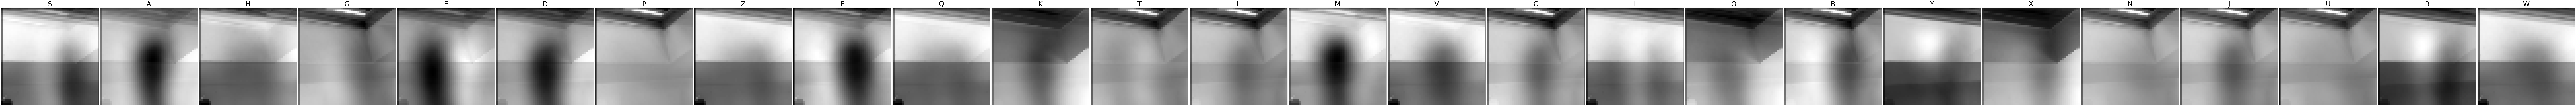

Number of components: 6 ; Explained variance: 0.76


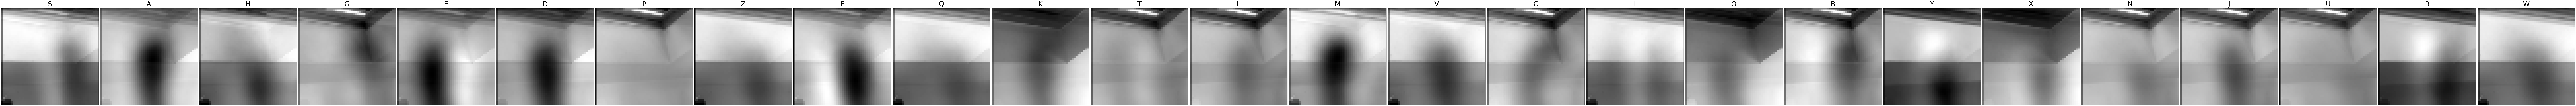

Number of components: 9 ; Explained variance: 0.8


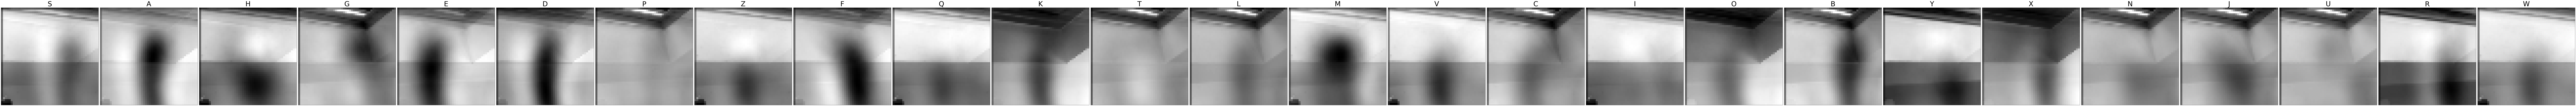

Number of components: 16 ; Explained variance: 0.85


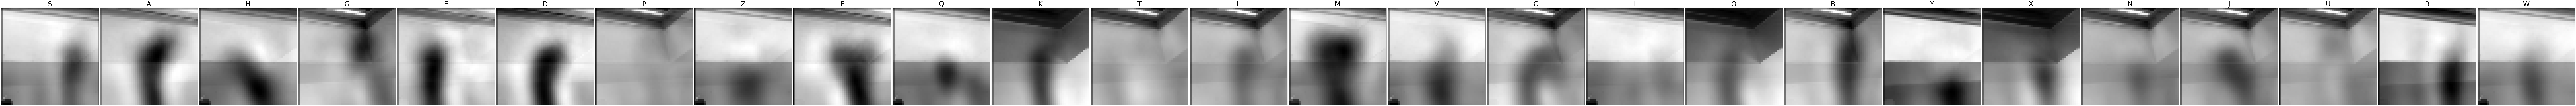

Number of components: 35 ; Explained variance: 0.9


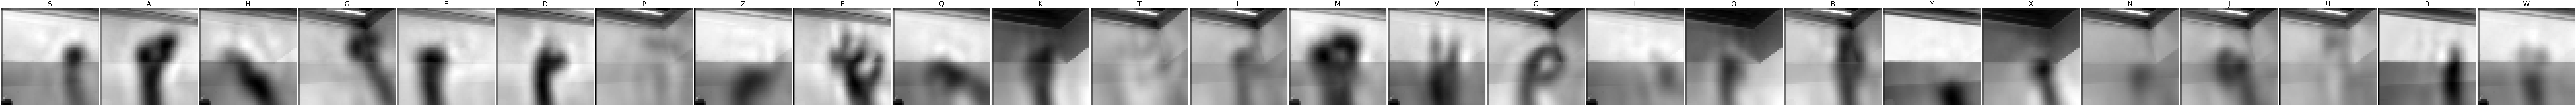

Number of components: 102 ; Explained variance: 0.95


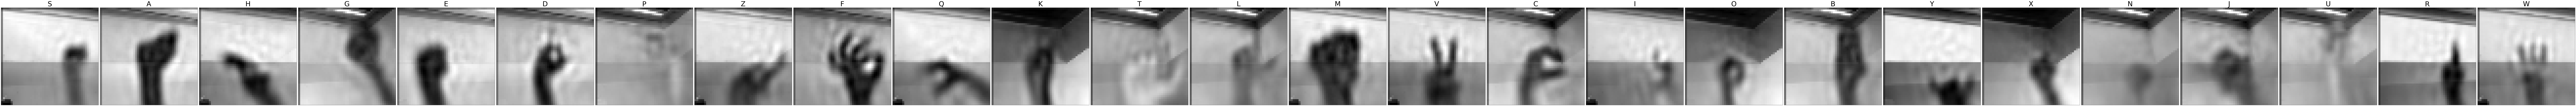

Number of components: 588 ; Explained variance: 0.99


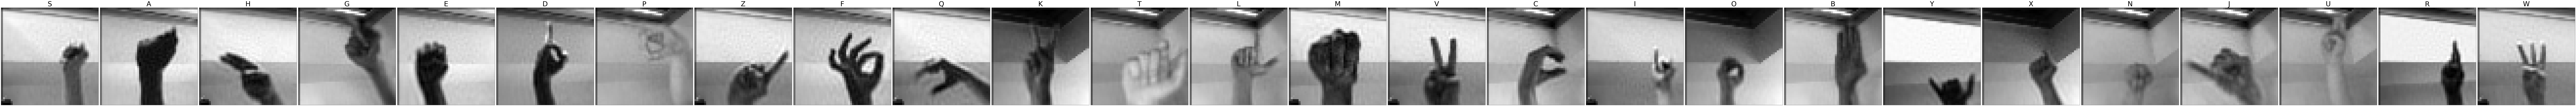

Number of components: 2500 (Original image)


In [153]:
# Pick n_components examples and their correspondent percentages of explained variance
ncps = [1, 2, 3, 4, 5]
variance_threshold = [0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
dimension_candidates = np.array([np.argmax(component_variance > i) for i in variance_threshold]).tolist()
ncps.extend(dimension_candidates)
cp_variance = [round(component_variance[i-1], 2) for i in ncps]
cp_variance.extend(variance_threshold)

for i in range(len(ncps)):
    print("Number of components:", ncps[i], "; Explained variance:", cp_variance[i])
    pca = PCA(n_components=ncps[i], svd_solver='randomized').fit(train_features)
    projected = pca.transform(example_features)
    plot_sign(pca.inverse_transform(projected), unique_labels)
    
print("Number of components: 2500 (Original image)")